# 干扰应用分析

In [1]:
import sys
sys.path.append('./tools')

from aggregation import *
import analyze
import display


filters = [
    filter_column_startswith(col_prefix=("container")),
    filter_column_useless(excol_prefix=("container")),
    filter_row_noise(col_prefix=("container")),    
]

agg_funcs = [
    lambda x : x.mean().to_frame().T,
]

after_agg_filters = [filter_column_useless()]

exp_root = "/home/ict/appProfile/data/stress/same_numa"
exp_roots = {"stresses": []}
for dir in os.listdir(exp_root):
    if dir == ".ipynb_checkpoints":
        continue
    exp_roots["stresses"].append(os.path.join(exp_root, dir))

exp_roots["stresses"].sort(key=lambda x : int(x.split('_')[-1]))
exp_roots

{'stresses': ['/home/ict/appProfile/data/stress/same_numa/cache_no_20231109091652',
  '/home/ict/appProfile/data/stress/same_numa/cpu_no_20231109093634',
  '/home/ict/appProfile/data/stress/same_numa/io_no_20231109095616',
  '/home/ict/appProfile/data/stress/same_numa/vm_no_20231109101559',
  '/home/ict/appProfile/data/stress/same_numa/net_no_20231109103540']}

## 一、Cache

In [2]:
exp_root = exp_roots["stresses"][0]

exp_data = read_from_dir(exp_root)
exp_data.set_workload_preprocess_funcs(filters).set_workload_agg_funcs(agg_funcs).workload_keys()

['cache_0', 'cache_1', 'cache_2', 'cache_3', 'cache_4', 'cache_5', 'cache_6']

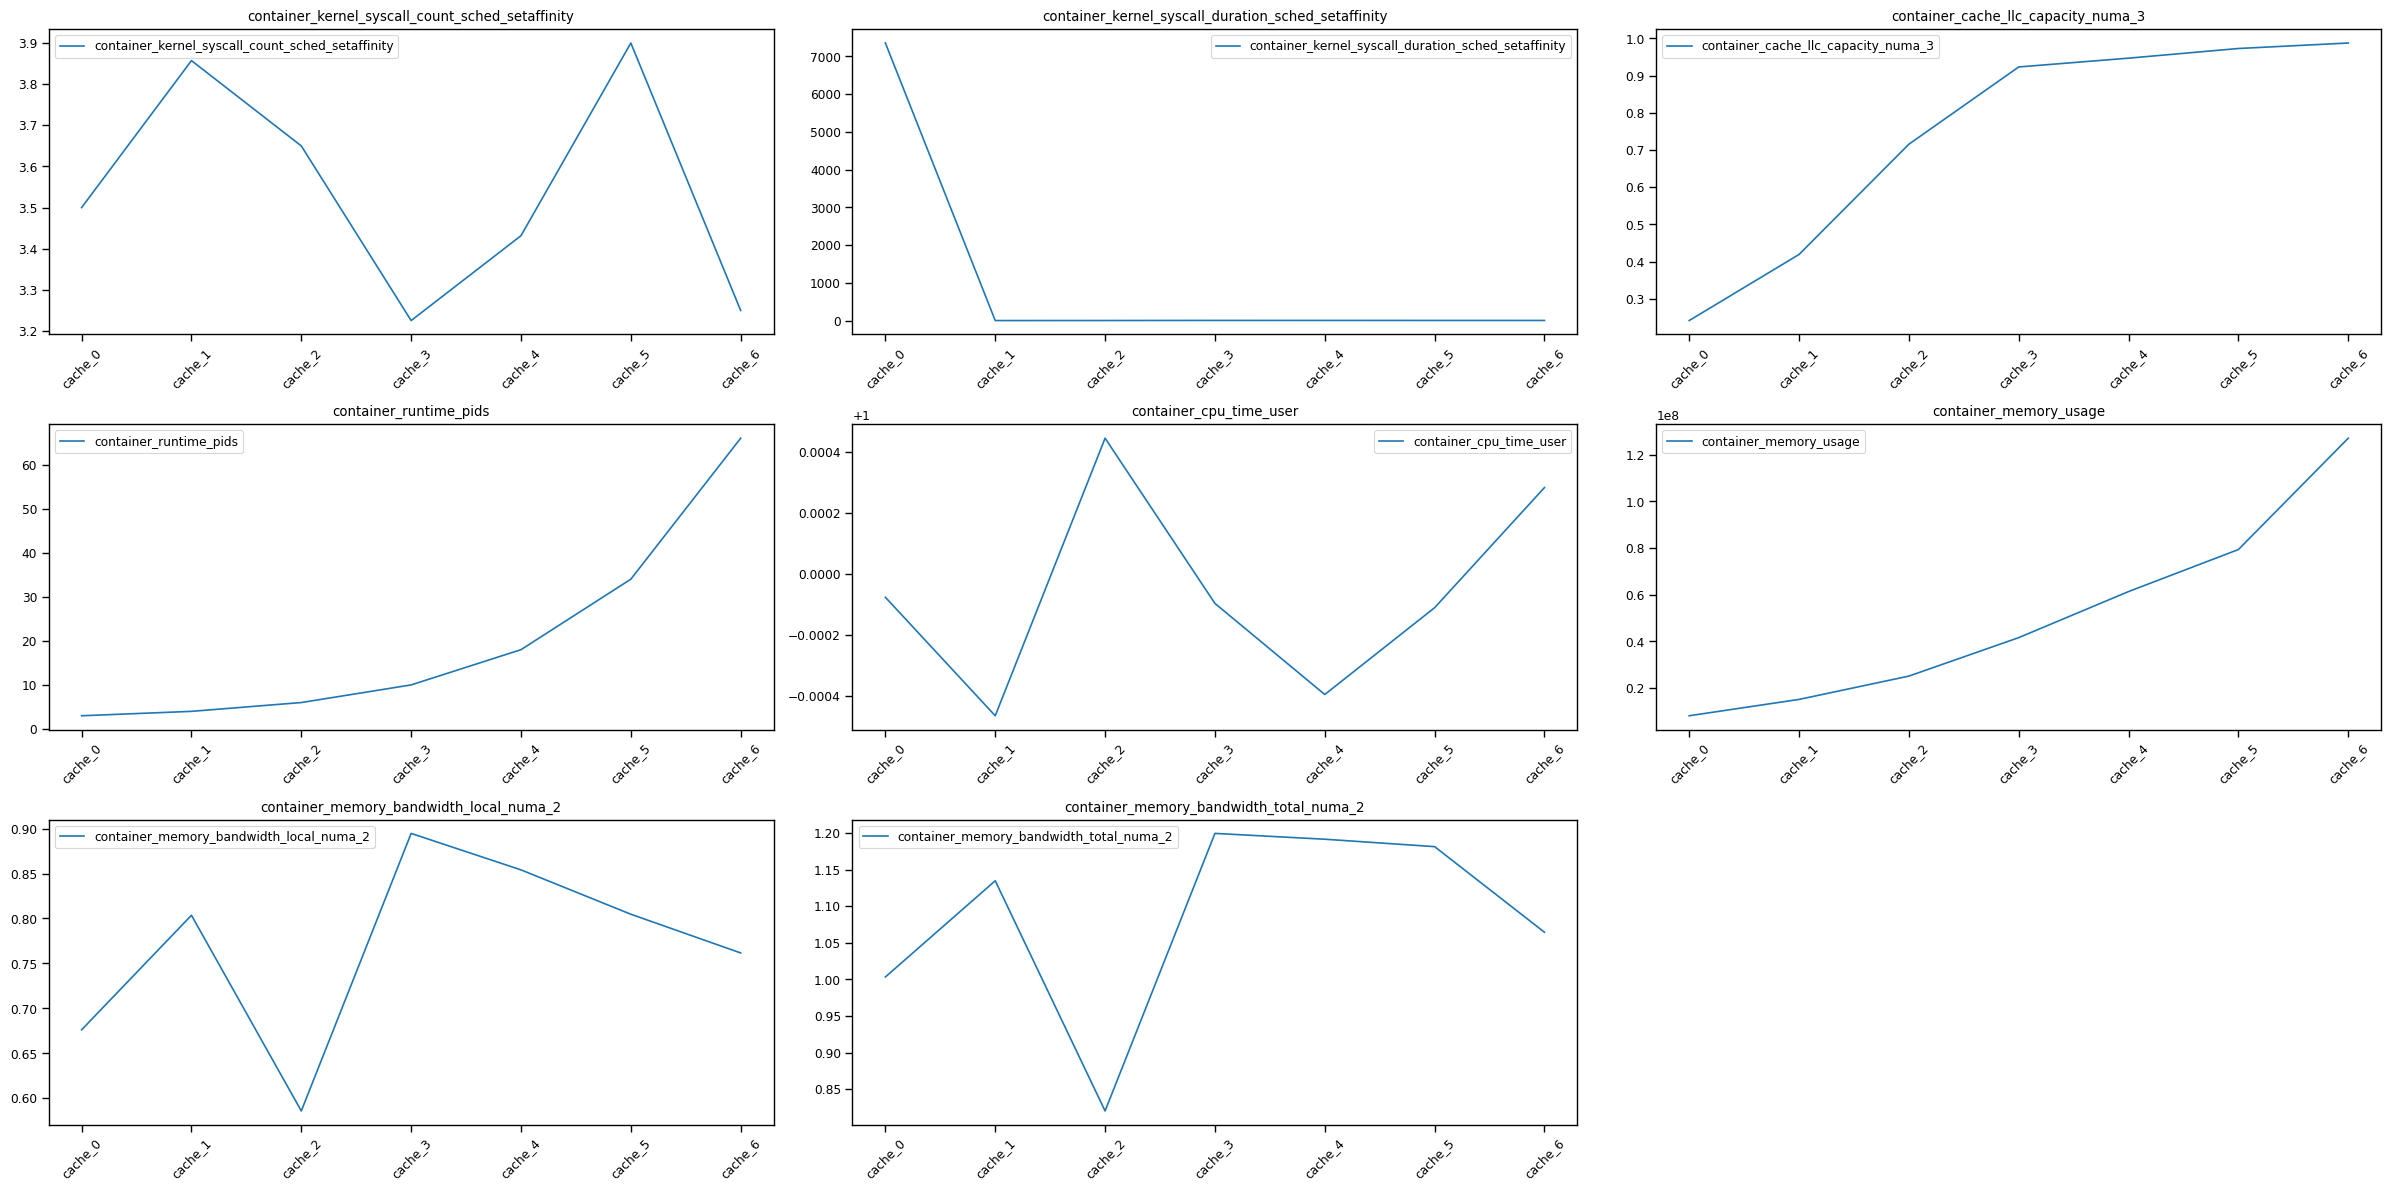

Index(['container_kernel_syscall_count_sched_setaffinity',
       'container_kernel_syscall_duration_sched_setaffinity',
       'container_cache_llc_capacity_numa_3', 'container_runtime_pids',
       'container_cpu_time_user', 'container_memory_usage',
       'container_memory_bandwidth_local_numa_2',
       'container_memory_bandwidth_total_numa_2'],
      dtype='object')

In [3]:
df_epoch = exp_data.agg_epoch(df_funcs=after_agg_filters)

display.plt_by_column(df_epoch)
df_epoch.columns

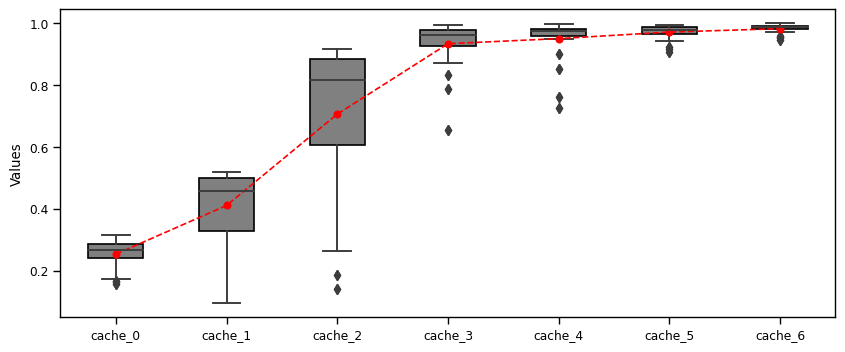

In [4]:
column = "container_cache_llc_capacity_numa_3"
exp_data.set_workload_preprocess_funcs(filters[:-1] + [filter_row_noise(col_prefix=(column))])
df = exp_data.one_column_on_workloads(column)
display.plt_box(df, "")

## 二、CPU

In [11]:
exp_root = exp_roots["stresses"][1]

exp_data = read_from_dir(exp_root)
exp_data.set_workload_preprocess_funcs(filters).set_workload_agg_funcs(agg_funcs).workload_keys()

['cpu_0', 'cpu_1', 'cpu_2', 'cpu_3', 'cpu_4', 'cpu_5', 'cpu_6']

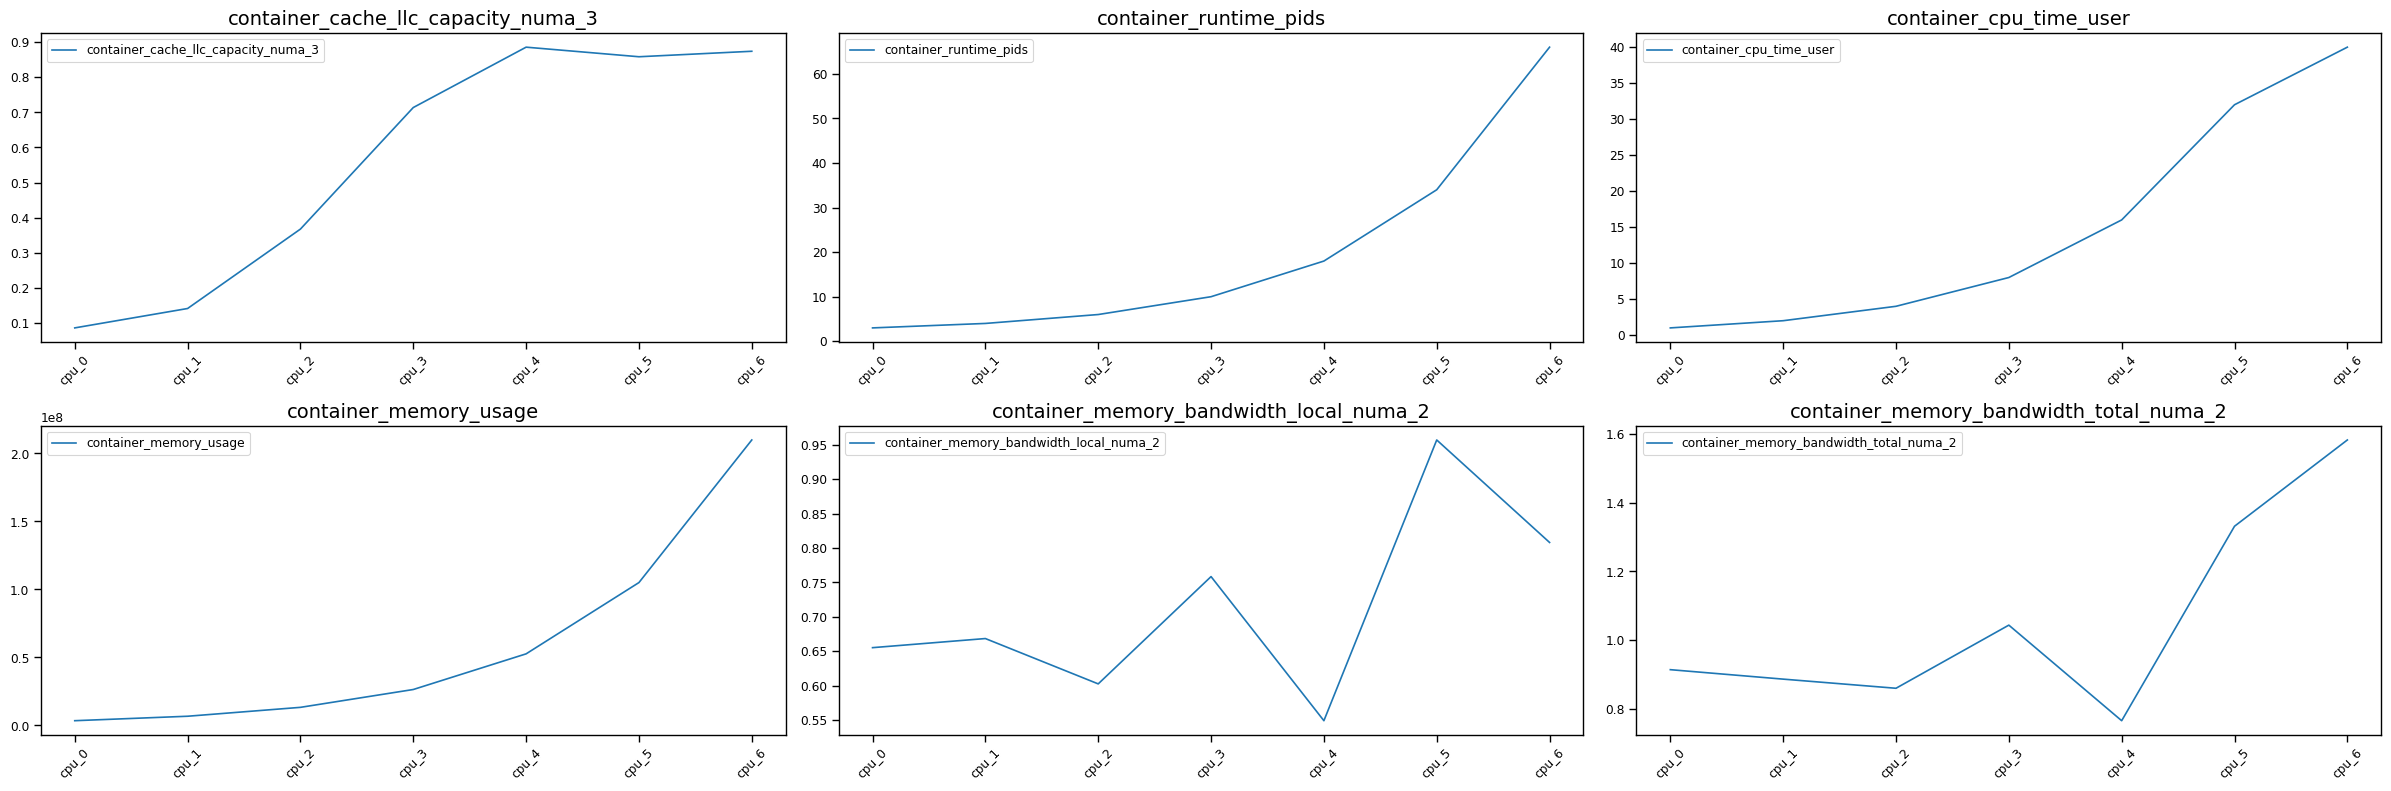

Index(['container_cache_llc_capacity_numa_3', 'container_runtime_pids',
       'container_cpu_time_user', 'container_memory_usage',
       'container_memory_bandwidth_local_numa_2',
       'container_memory_bandwidth_total_numa_2'],
      dtype='object')

In [12]:
df_epoch = exp_data.agg_epoch(df_funcs=after_agg_filters)
display.plt_by_column(df_epoch)
df_epoch.columns

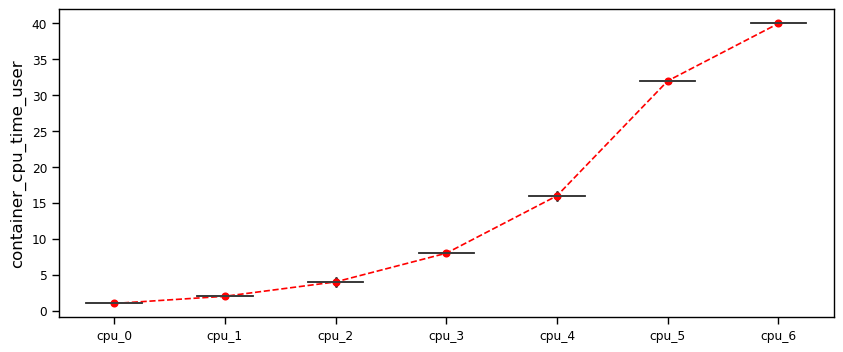

In [7]:
column = "container_cpu_time_user"
df = exp_data.one_column_on_workloads(column)
exp_data.set_workload_preprocess_funcs(filters[:-1] + [filter_row_noise(col_prefix=(column))])
display.plt_box(df, "", column)

## 三、IO

In [8]:
exp_root = exp_roots["stresses"][2]

exp_data = read_from_dir(exp_root)
exp_data.set_workload_preprocess_funcs(filters).set_workload_agg_funcs(agg_funcs).workload_keys()

['io_0', 'io_1', 'io_2', 'io_3', 'io_4', 'io_5', 'io_6']

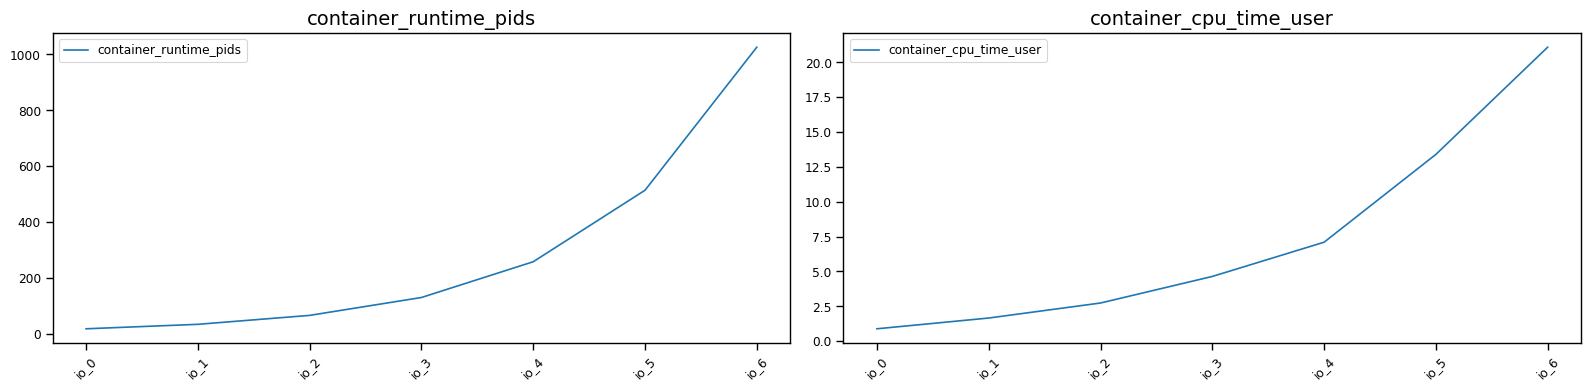

Index(['container_kernel_syscall_count_fadvise64',
       'container_kernel_syscall_count_fdatasync',
       'container_kernel_syscall_count_fsync',
       'container_kernel_syscall_count_ioctl',
       'container_kernel_syscall_count_lseek',
       'container_kernel_syscall_count_mmap',
       'container_kernel_syscall_count_msync',
       'container_kernel_syscall_count_munmap',
       'container_kernel_syscall_count_nanosleep_time64',
       'container_kernel_syscall_count_read',
       'container_kernel_syscall_count_select',
       'container_kernel_syscall_count_sync_file_range',
       'container_kernel_syscall_count_write',
       'container_kernel_syscall_duration_fadvise64',
       'container_kernel_syscall_duration_fdatasync',
       'container_kernel_syscall_duration_fsync',
       'container_kernel_syscall_duration_ioctl',
       'container_kernel_syscall_duration_lseek',
       'container_kernel_syscall_duration_mmap',
       'container_kernel_syscall_duration_msync',
   

In [9]:
df_epoch = exp_data.agg_epoch(df_funcs=after_agg_filters)
display.plt_by_column(df_epoch, columns=['container_runtime_pids', 'container_cpu_time_user'])
df_epoch.columns

In [10]:
column = "container_block_io_bytes_output"
exp_data.set_workload_preprocess_funcs(filters[:-1] + [filter_row_noise(col_prefix=(column))])
df = exp_data.one_column_on_workloads(column) vb
display.plt_box(df, "", column)

SyntaxError: invalid syntax (1258699722.py, line 3)

## 四、VM

In [ ]:
exp_root = exp_roots["stresses"][3]

exp_data = read_from_dir(exp_root)
exp_data.set_workload_preprocess_funcs(filters).set_workload_agg_funcs(agg_funcs).workload_keys()

In [ ]:
df_epoch = exp_data.agg_epoch(df_funcs=after_agg_filters)
display.plt_by_column(df_epoch)
df_epoch.columns

In [ ]:
column = "container_memory_usage"
df = exp_data.one_column_on_workloads(column)
df = filter_row_noise(col_prefix=(column))(df)
display.plt_box(df, "", column)

# 五、Net

In [ ]:
exp_root = exp_roots["stresses"][4]
exp_data = read_from_dir(exp_root)
exp_data.set_workload_preprocess_funcs(filters).set_workload_agg_funcs(agg_funcs).workload_keys()

In [ ]:
df_epoch = exp_data.agg_epoch(df_funcs=after_agg_filters)
display.plt_by_column(df_epoch, columns=['container_runtime_pids', 'container_cpu_time_user'])
df_epoch.columns

In [ ]:
column = "container_kernel_syscall_count_recvfrom"
df = exp_data.one_column_on_workloads(column)
display.plt_box(df, "", column)